## Lossy Compression with Side Information Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    repr_latex = True,          # Jupyter Notebook LaTeX display
    venn_latex = True,          # LaTeX in diagrams
    proof_note_color = "blue",  # Reasons in proofs are blue
    random_seed = 4321          # Random seed for example searching
)

### Noncausal Side Information

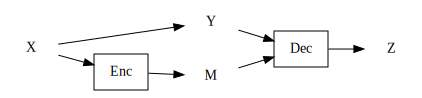

In [2]:
M, X, Y, Z = rv("M, X, Y, Z")
R = real("R")

# Lossy compression with side info available noncausally at decoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_edge(X, Y)                  # Correlated source X, Y
model.add_node(X, M, label = "Enc")   # Encoder maps X to M
model.add_node(M+Y, Z, label = "Dec") # Decoder maps M,Y to Z

model.graph()                         # Draw diagram

In [3]:
R_opt = model.minimum(R, R) # Get optimal rate, recovers [Wyner-Ziv 1976]
R_opt.upper_bound()

(( ( markov(A_M, X, Y) )
 &( markov(X, A_M+Y, Z) ) ).exists(A_M)).minimum(I(A_M&X|Y))

In [4]:
# Converse proof, output auxiliary
(R_opt.lower_bound() >= R_opt.upper_bound()).check_getaux_array()

CompArray(
[[A_M, Y_P+X_F+M]])

In [5]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> model.get_inner()).proof()

In [6]:
bool(R_opt >= I(X & Z | Y))  # A lower bound on R_opt

True

In [7]:
# The program makes an implicit assumption that the empirical joint distribution
# of (X,Y,Z) is fixed, so we are not free to choose Z conditionally
# independent of Y given X. Hence, the following test on upper bound fails:
# bool(R_opt <= I(X & Z))
# To show the upper bound, we need an additional assumption:
bool(markov(Y, X, Z) >> (R_opt <= I(X & Z)))

True

### Causal Side Information

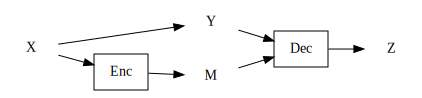

In [8]:
# Lossy compression with side info available causally at decoder
model = CodingModel()
model.set_rate(M, R)                  # The rate of M is R
model.add_edge(X, Y)                  # Correlated source X, Y
model.add_node(X, M, label = "Enc")   # Encoder maps X to M
model.add_node(M+Y, Z,
   rv_in_causal = Y, label = "Dec")   # Decoder maps M,Y to Z

model.graph()                         # Draw diagram

In [9]:
R_opt = model.minimum(R, R) # Get optimal rate, recovers [Weissman-El Gamal 2006]
R_opt.upper_bound()

(( ( markov(A_M, X, Y) )
 &( markov(X, A_M+Y, Z) ) ).exists(A_M)).minimum(I(A_M&X))

In [10]:
# Converse proof, output auxiliary
(R_opt.lower_bound() >= R_opt.upper_bound()).check_getaux_array()

CompArray(
[[A_M, X_P+M]])

In [11]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> model.get_inner()).proof()

In [12]:
bool(R_opt >= I(X & Z | Y))  # A lower bound on R_opt

True

In [13]:
bool(markov(Y, X, Z) >> (R_opt <= I(X & Z))) # Upper bound

True

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 11.
-  A. D. Wyner and J. Ziv, "The rate-distortion function for source coding with side information at the decoder," IEEE Transactions on Information Theory, vol. 22, no. 1, pp. 1–10, January 1976.
-   T. Weissman and A. El Gamal, "Source coding with limited-look-ahead side information at the decoder," IEEE Trans. Inf. Theory, vol. 52, no. 12, pp. 5218–5239, Dec. 2006.
